# Zone Equalisation Normalisation Example

1. [Imports and Set Up](#imports)
2. [BAM to bigWig Mapping](#bam-to-bigwig)
3. [Reversing bigWig Normalisation](#reverse-norm)
4. [Running ZEN Normalisation](#run-zen)
    1. [Specifying Input bigWigs](#run-zen-inputs)
    2. [Running ZEN Normalisation](#run-zen-convolution)
    3. [Distribution Fitting](#run-zen-distribution)
    4. [Signal Zone Prediction](#run-zen-zones)
    5. [Creating Normalised bigWigs](#run-zen-norm)
5. [Comparing Normalisation Method Performance Genome-Wide](#norm-compare)

## 1) Imports and Set Up <a id="imports"></a>

Import the ZEN-norm modules and other packages

In [1]:
from ZEN_norm_test.reverse_norm import ReverseNorm
from ZEN_norm_test.zone_norm import ZoneNorm

import matplotlib.pyplot as plt
import numpy as np

Set global parameters

In [2]:
# Max number of processors to use (set for your system)
cores = 12

## 2) BAM to bigWig Mapping <a id="bam-to-bigwig"></a>

ZEN-norm is designed to run on genomic signals from either BAM or bigWig files. If you have BAM files, they first must be mapped to bigWigs. This can be done through `ZoneNorm` using the `bam_paths` parameter (see below).

### Example Using Erythroid ATAC-seq BAMs to Non-Normalised bigWigs

ZEN normalisation should ideally be run on non-normalised bigWigs. These may first need to be created if you don't already have access to them. If you only have access to pre-normalised bigWigs, see the ['Reversing bigWig Normalisation'](#reverse-norm) section.

For ATAC-seq, bigWigs can be generated from BAMs by creating a `ZoneNorm` object with the following parameters:
* `analysis_name`: Set as the name of the output folder.
* `bam_paths`: Set as a list or directory of `.bam` files.
* `n_cores`: The number of processors to use.
* `norm_method`: Specifies how bigWig files are normalised. Set as `None` or `ZEN` to create non-normalised bigWigs at this stage (more steps are required to create ZEN normalised bigWigs) or as a deepTools normalisation method (`RPKM`, `CPM`, `BPM`, `RPGC`) to create bigWigs normalised with this (see `NormCompare`).
* `extend_reads`: Set as `True` to enable read extension during bigWig creation, as by default this is `False`.

In [3]:
# Create bigWigs without normalisation to use as input for ZEN normalisation
ery_atac_znorm = ZoneNorm(analysis_name = "Erythroid_ATAC",
                          bam_paths = "/ceph/project/Wellcome_Discovery/towilson/Datasets/Human/Erythroid/50_Erythroid_Donors/hg38/Unpublished/ATAC-seq/All_Reads/BAMs",
                          n_cores = cores,
                          norm_method = "ZEN",
                          extend_reads = True)

Opening 14 bigWig files
Setting chromosomes as autosomal and sex chromosomes


After creating a `ZoneNorm` object, printing it will display information about it including: the output directory, chromosomes to run further analysis on (all chromosomes are included in generated bigWigs), sample details and cores.

In [4]:
# Optionally display information about the analysis
print(ery_atac_znorm)

ZoneNorm object for "Erythroid_ATAC"
   * Output directory: /ceph/project/Wellcome_Discovery/towilson/Datasets/Mouse/mESC/E14_to_EB_H3K27ac/mm10/bigWigs/Erythroid_ATAC   * 24 chromosome(s): chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, chrY
   * Number of samples: 14
   * Sample names: Don002_ATAC_d13_rep1, Don002_ATAC_d13_rep2, Don002_ATAC_d13_rep3, Don002_ATAC_d13_rep4, Don002_ATAC_d13_rep5, Don002_ATAC_d13_rep6, Don002_ATAC_d13_rep7, Don003_ATAC_d13_rep1, Don003_ATAC_d13_rep2, Don003_ATAC_d13_rep3, Don003_ATAC_d13_rep4, Don003_ATAC_d13_rep5, Don003_ATAC_d13_rep6, Don003_ATAC_d13_rep7
   * Resources: 12 cores



Additionally, a region of genomic signal can be visualised using method `plotTracks`.

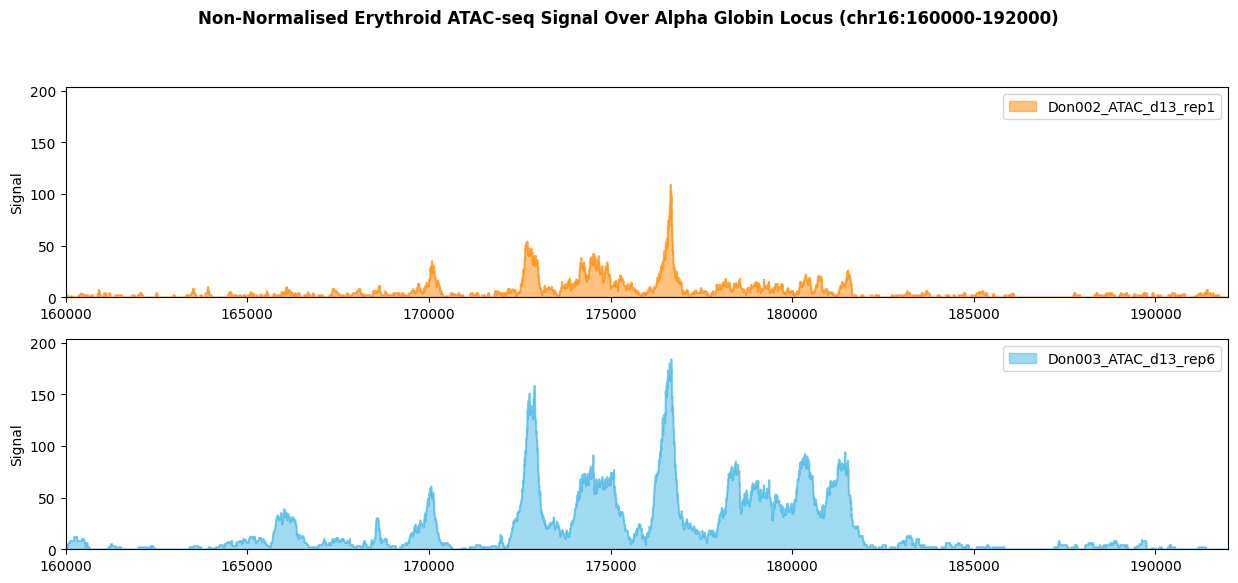

In [5]:
# Coordinates of the human alpha globin locus
chromosome = "chr16"
start = 160000
end = 192000

# Plot the raw signal for two samples
ery_atac_znorm.plotTracks(chromosome = chromosome,
                          start_coord = start,
                          end_coord = end,
                          plot_samples = ["Don002_ATAC_d13_rep1", "Don003_ATAC_d13_rep6"],
                          custom_colours = ["#FF8800", "#41B6E6"],
                          overlay_plots = False,
                          main_title = f"Non-Normalised Erythroid ATAC-seq Signal Over Alpha Globin Locus ({chromosome}:{start}-{end})")

### Example using RAD21 ChIP-seq BAMs to Non-Normalised bigWigs

For ChIP-seq, the same parameters can be used as for ATAC-seq (explained above).

In [5]:
# Create bigWigs without normalisation to use as input for ZEN normalisation
rad21_chip_znorm = ZoneNorm(analysis_name = "Erythroid_RAD21_ChIPseq",
                            bam_paths = "/ceph/project/Wellcome_Discovery/towilson/Datasets/Human/Erythroid/50_Erythroid_Donors/hg38/E_Georgiades_2025/RAD21_ChIP-seq/BAMs",
                            n_cores = cores,
                            norm_method = "ZEN",
                            extend_reads = True)

Opening 8 bigWig files
Setting chromosomes as autosomal and sex chromosomes


In [7]:
# Optionally display information about the analysis
print(rad21_chip_znorm)

ZoneNorm object for "Erythroid_RAD21_ChIPseq"
   * 24 chromosome(s): chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, chrY
   * Number of samples: 8
   * Sample names: Don001_RAD21_d13_rep1, Don001_RAD21_d13_rep2, Don001_RAD21_d13_rep3, Don002_RAD21_d13_rep1, Don002_RAD21_d13_rep2, Don002_RAD21_d13_rep3, Don030_RAD21_d13_rep1, Don030_RAD21_d13_rep3
   * Resources: 12 cores



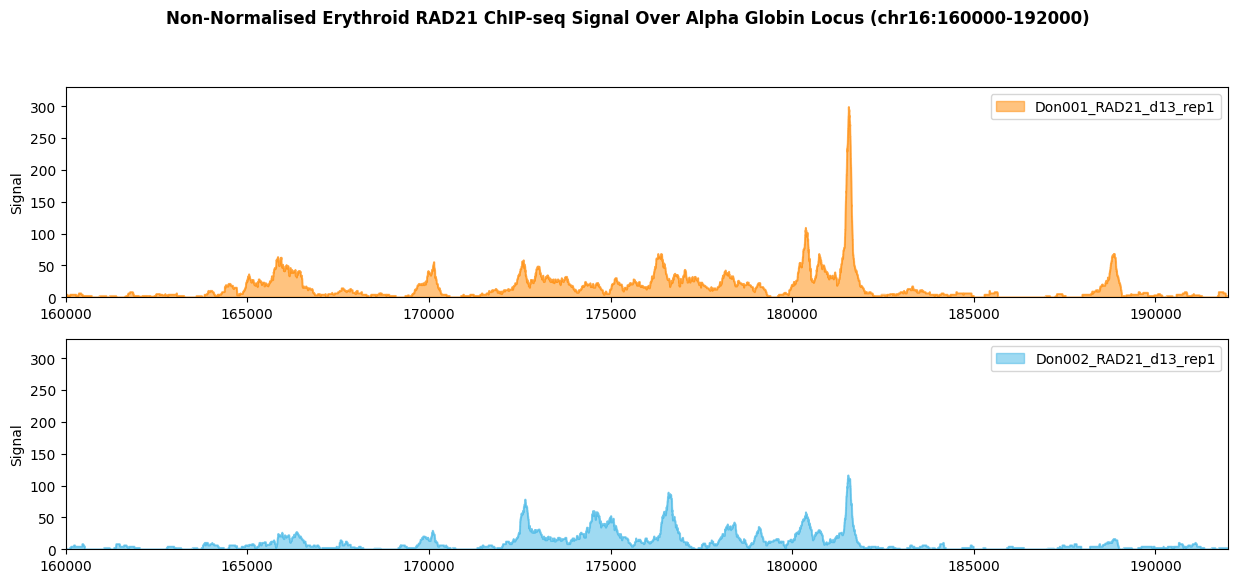

In [8]:
# Coordinates of the human alpha globin locus
chromosome = "chr16"
start = 160000
end = 192000

# Plot the raw signal
rad21_chip_znorm.plotTracks(chromosome = chromosome,
                            start_coord = start,
                            end_coord = end,
                            plot_samples = ["Don001_RAD21_d13_rep1", "Don002_RAD21_d13_rep1"],
                            custom_colours = ["#FF8800", "#41B6E6"],
                            overlay_plots = False,
                            main_title = f"Non-Normalised Erythroid RAD21 ChIP-seq Signal Over Alpha Globin Locus ({chromosome}:{start}-{end})")

### Example Using HeLA TT-seq BAMs to Non-Normalised bigWigs

For transcriptional assays such as TT-seq, bigWigs can be generated from BAMs in a similar way to ATAC-seq or ChIP-seq (see above). An additional parameter may be included to split signal into forward (positive) and reverse (negative) strands:
* `filter_strand`: Setting this as `True` will split a BAM into forward and reverse strand bigWigs, or setting `forward` or  `reverse` will keep only one strand. The default is `False` which disables strand filtering. 

In [6]:
# Create bigWigs without normalisation to use as input for ZEN normalisation
hela_ttseq_znorm = ZoneNorm(analysis_name = "HeLa_TTseq",
                            bam_paths = "/ceph/project/Wellcome_Discovery/towilson/Datasets/Human/Cervical_Carcinoma/HeLa_TT-seq_A_Fiszbein_2024/hg38/BAMs",
                            n_cores = cores,
                            norm_method = "ZEN",
                            filter_strand = True,
                            extend_reads = False)

Opening 12 bigWig files
Setting chromosomes as autosomal and sex chromosomes


In [10]:
# Optionally display information about the analysis
print(hela_ttseq_znorm)

ZoneNorm object for "HeLa_TTseq"
   * 24 chromosome(s): chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, chrY
   * Number of samples: 12
   * Sample names: HeLa_TTseq_Control_Rep1_Pos, HeLa_TTseq_Control_Rep1_Neg, HeLa_TTseq_Control_Rep2_Pos, HeLa_TTseq_Control_Rep2_Neg, HeLa_TTseq_Control_Rep3_Pos, HeLa_TTseq_Control_Rep3_Neg, HeLa_TTseq_U1AMO_Rep1_Pos, HeLa_TTseq_U1AMO_Rep1_Neg, HeLa_TTseq_U1AMO_Rep2_Pos, HeLa_TTseq_U1AMO_Rep2_Neg, HeLa_TTseq_U1AMO_Rep3_Pos, HeLa_TTseq_U1AMO_Rep3_Neg
   * Resources: 12 cores



View the strand separated signal using `plotTracks`

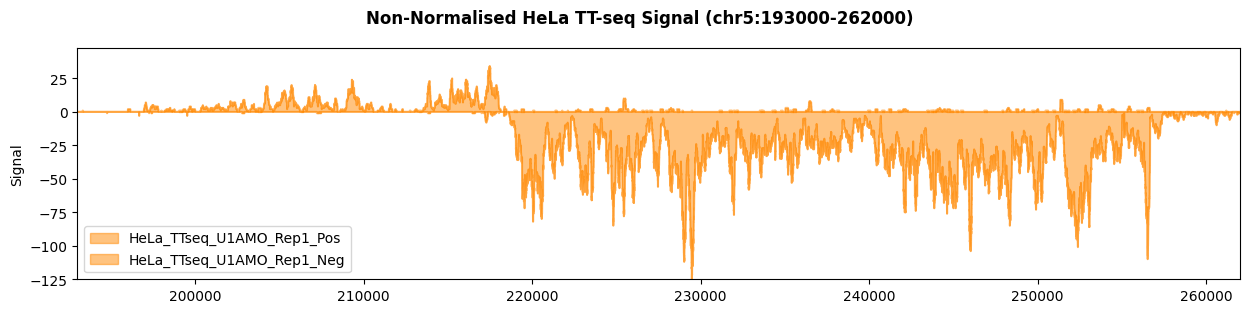

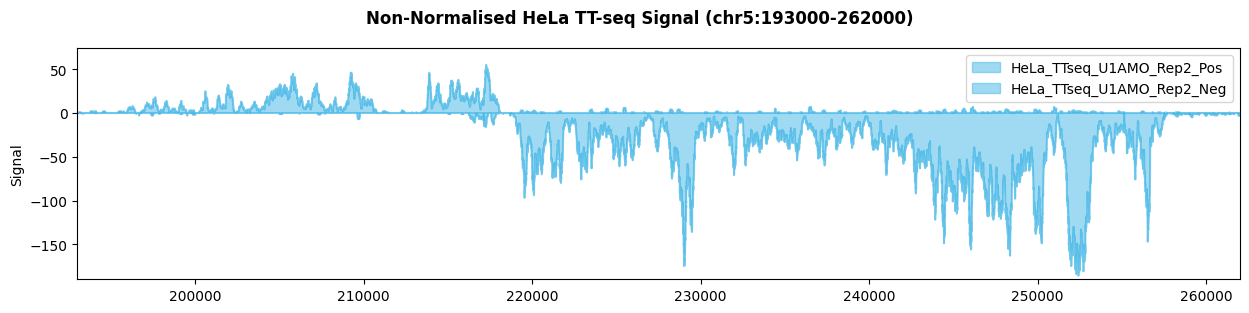

In [11]:
# Coordinates over the CCDC127 and SDHA genes
chromosome = "chr5"
start = 193000
end = 262000

# Plot the raw signal
hela_ttseq_znorm.plotTracks(chromosome = chromosome,
                            start_coord = start,
                            end_coord = end,
                            plot_samples = ["HeLa_TTseq_U1AMO_Rep1_Pos", "HeLa_TTseq_U1AMO_Rep1_Neg"],
                            custom_colours = ["#FF8800", "#FF8800"],
                            overlay_plots = True,
                            main_title = f"Non-Normalised HeLa TT-seq Signal ({chromosome}:{start}-{end})")

hela_ttseq_znorm.plotTracks(chromosome = chromosome,
                            start_coord = start,
                            end_coord = end,
                            plot_samples = ["HeLa_TTseq_U1AMO_Rep2_Pos", "HeLa_TTseq_U1AMO_Rep2_Neg"],
                            custom_colours = ["#41B6E6", "#41B6E6"],
                            overlay_plots = True,
                            main_title = f"Non-Normalised HeLa TT-seq Signal ({chromosome}:{start}-{end})")

## 3) Reversing bigWig Normalisation <a id="reverse-norm"></a>

If BAMs are not avaliable, then non-normalised bigWigs may be created from pre-normalised bigWigs. This can be done after any linear normalisation method (such as RPKM, CPM) using the `ReverseNorm` module. 

#### Example Using Publically Downloaded mESC ATAC-seq bigWigs

To initialise a `ReverseNorm` instance, set the following parameters:
* `analysis_name`: Set as the name of the output folder.
* `bigwig_paths`: Set as a list or directory of `.bw` and / or `.bigWig` files.
* `n_cores`: The number of processors to use.


In [7]:
# Set parameters for reverse normalisation
mesc_rev = ReverseNorm(analysis_name = "mESC_ATAC",
                       bigwig_paths = ["/ceph/project/Wellcome_Discovery/towilson/Datasets/Mouse/mESC/E14_to_EB_H3K27ac/mm10/bigWigs/E14_ATAC_RA.bw", "/ceph/project/Wellcome_Discovery/towilson/Datasets/Mouse/mESC/E14_to_EB_H3K27ac/mm10/bigWigs/E14_ATAC_LIF.bw"],
                       n_cores = cores)

Opening 2 bigWig files
Setting chromosomes as autosomal and sex chromosomes


Then run the method `reverse` to create reverse normalised bigWigs. This works through estimating the value of one read fragment per bigWig, then dividing signal from all chromosomes by this. To speed up fragment size estimation, it is advisable to set the following parameter:
* `chromosomes`: A list of chromosomes to estimate fragment size from. Generally a small chromosome is sufficient, but by default all chromosomes will be used if not set.

In [ ]:
# Perform reverse normalisation, using a small chromosome for fragment size estimation
mesc_rev.reverseNorm(chromosomes = ["chr19"])

Estimating fragment sizes from 1 chromosome for 2 samples
E14_ATAC_LIF was pre-normalised and has a divisor of 0.027000000700354576
Saving signal for E14_ATAC_LIF to bigWig "mESC_ATAC/Results/Reverse_Normalised/BigWigs/E14_ATAC_LIF_reverse_norm.bw"Saving signal for E14_ATAC_RA to bigWig "mESC_ATAC/Results/Reverse_Normalised/BigWigs/E14_ATAC_RA_reverse_norm.bw"

E14_ATAC_RA was pre-normalised and has a divisor of 0.032999999821186066
Finished saving bigWigs


## 4) Running ZEN Normalisation <a id="run-zen"></a>

Once you have access to bigWigs (ideally non-normalised), you can ZEN normalise them in several steps using the `ZoneNorm` module. 

### 4.1) Specifying Input bigWigs <a id="run-zen-inputs"></a>

If you have used `ZoneNorm` to map BAMs to bigWigs, the same `ZoneNorm` instance can be used as the parameters and path to bigWigs have already been set. Otherwise, a new `ZoneNorm` object needs to be created using parameter `bigwig_paths` instead of `bam_paths` to set bigwigs as input rather than BAMs:
* `analysis_name`: Set as the name of the output folder.
* `bigwig_paths`: Set as a list or directory of `.bw` and / or `.bigWig` files.
* `n_cores`: The number of processors to use.
* `norm_method`: Specifies how bigWig files are normalised. Set as `ZEN` to enable ZEN normalisation.

#### Example Using Publically Downloaded mESC ATAC-seq bigWigs

In [8]:
# Initialise with reverse normalised bigWigs
mesc_atac_znorm = ZoneNorm(analysis_name = "mESC_ATAC",
                           bigwig_paths = "/ceph/project/Wellcome_Discovery/towilson/Datasets/Mouse/mESC/E14_to_EB_H3K27ac/mm10/bigWigs/mESC_ATAC/Results/Reverse_Normalised/BigWigs",
                           n_cores = cores,
                           norm_method = "ZEN")

Opening 2 bigWig files
Setting chromosomes as autosomal and sex chromosomes


In [14]:
print(mesc_atac_znorm)

ZoneNorm object for "mESC_ATAC"
   * 21 chromosome(s): chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chrX, chrY
   * Number of samples: 2
   * Sample names: E14_ATAC_LIF_reverse_norm, E14_ATAC_RA_reverse_norm
   * Resources: 12 cores



### 4.2) Signal Convolution <a id="run-zen-convolution"></a>

After initialising a `ZoneNorm` object, the next step is to create a smoothed version of the signal via convolution. This smoothed signal helps separate biological signal from noise by reducing the influence of local fluctuations. However, the normalised bigWig files produced in the final step are scaled version of the original bigWig signal, and not this smoothed signal.

#### Default Smoothing Kernel

The recommended smoothing kernel is a 301 base pair triangular kernel, which is set by default when a `ZoneNorm` instance is initialised.

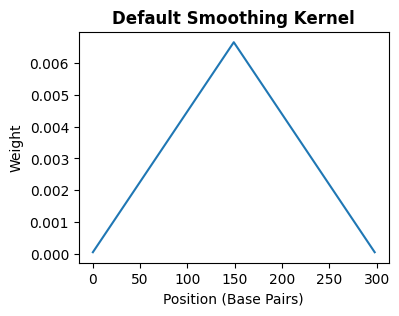

In [ ]:
# Get the default 301 base-pair triangle kernel
default_kernel = ZoneNorm.createTriangleKernel(size = 301)

# View the smoothing kernel
plt.figure(figsize = (4, 3))
plt.plot(default_kernel)
plt.title("Default Smoothing Kernel", fontweight = "bold")
plt.xlabel("Position (Base Pairs)")
plt.ylabel("Weight")
plt.show()

#### Setting a Custom Kernel

It is also possible to use a custom kernel to use for signal smoothing. For example, a Gaussian distribution kernel can be generated as follows:

In [9]:
# Set mean and standard deviation
mu = 0
sigma = 1
# Kernel size
n_bps = 301

# Create normal distribution kernel
gaussian_kernel = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.linspace(mu - 4 * sigma, mu + 4 * sigma, n_bps) - mu) / sigma) **2)

To override the default kernel, the new kernel can be set during the initialisation of the `ZoneNorm` instance using parameter `kernel`, or after using the method `setKernel`. In either case:
* `kernel`: Set as a numerical list or array representing a kernel. If set as an empty list or array, the default kernel will be used.

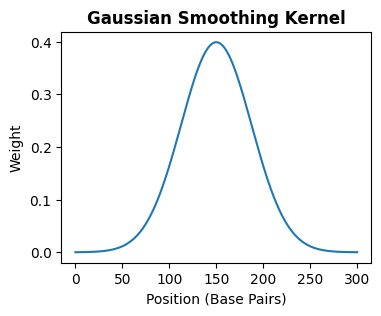

In [10]:
# Set kernel after initialisation
mesc_atac_znorm.setKernel(gaussian_kernel)

# View the set kernel
mesc_atac_znorm.plotKernel(title = "Gaussian Smoothing Kernel")

#### Running Signal Convolution

Once the kernel is set (or left unset to use the default), the method `convolveSignals` should be run. No parameters need to be specified when calling this method; however, the following are worth noting:
* `chromosomes`: Optional list or array of chromosomes to run convolution for. If not set, all chromosomes will be used. Setting this as a single chromosome, e.g. ["chr19"], can be helpful to verify that the step completes successfully.
* `replace_existing`: If set as `True`, any existing output files generated by this method will be recreated. This is useful if a previous run was interrupted and produced incomplete or corrupt files. If `False` (default), only missing files will be generated without overwriting existing ones.

In [12]:
# Create smoothed signal for erythroid ATAC-seq
ery_atac_znorm.convolveSignals()

Signal, smoothed signal and missing signal already created for chromosomes


In [13]:
# Create smoothed signal for erythroid RAD21 ChIP-seq
rad21_chip_znorm.convolveSignals()

Signal, smoothed signal and missing signal already created for chromosomes


In [14]:
# Create smoothed signal for erythroid HeLa cell TT-seq
hela_ttseq_znorm.convolveSignals()

Signal, smoothed signal and missing signal already created for chromosomes


In [15]:
# Create smoothed signal for mESC ATAC-seq
mesc_atac_znorm.convolveSignals()

Signal, smoothed signal and missing signal already created for chromosomes


#### Saving Smoothed Signal to bigWigs

If you want to save these convolved signals to bigWigs, the method `createSmoothBigWigs` can be used.

In [ ]:
# Optionally save convolved signals to bigWig
ery_atac_znorm.createSmoothBigWigs()

#### Visualising Smoothed Signal

In [ ]:
# Get signal before and after convolution
ery_original_signal = ery_atac_znorm.getOriginalSignal(sample_name = "Don002_ATAC_d13_rep1", chromosome = chromosome)
ery_smooth_signal = ery_atac_znorm.getSmoothedSignal(sample_name = "Don002_ATAC_d13_rep1", chromosome = chromosome)

# Coordinates of the human alpha globin locus
chromosome = "chr16"
start = 160000

end = 192000

# Plot the raw signal for two samples 
ery_atac_znorm.plotTracks(chromosome = chromosome,
                          start_coord = start,
                          end_coord = end,
                          signals = {"Don002_ATAC_d13_rep1_original": ery_original_signal, "Don002_ATAC_d13_rep1_smooth": ery_smooth_signal},
                          custom_colours = ["#FF8800", "#FF8800"],
                          overlay_plots = False,
                          main_title = f"Original vs Smoothed Erythroid ATAC-seq Signal Over Alpha Globin Locus ({chromosome}:{start}-{end})")

TypeError: ChromAnalysisExtended.plotTracks() missing 3 required positional arguments: 'start_coord', 'end_coord', and 'chromosome'

### 4.3) Distribution Fitting <a id="run-zen-distribution"></a>

After signal convolution, the next step is fitting distributions to the smoothed signal and measuring how well they fit with the Kolmogorov–Smirnov test. One of these distributions is later used to form a threshold for separating signal from background noise. 

#### Example Using Default Distribution

By default, a `ZoneNorm` instance is set to test only the Laplace distribution. This can be checked by printing the attribute `test_distributions`.

In [ ]:
# View the list of distributions set to test (only Laplace)
print(f"Set distribution(s) for mESC ATAC-seq: {mesc_atac_znorm.getTestDistributions()}")

AttributeError: 'ZoneNorm' object has no attribute 'getTestDistributions'

In [ ]:
# Calculate parameters of Laplace fitted to the smoothed signal, alongside stats quantifying its fit
mesc_atac_znorm.testDistributions()

#### Examples Testing Additional Distributions

`ZenNorm` allows all two parameter SciPy distribution to be tested. These include Normal, Laplace, Logistic, left skewed Gumbell and right skewed Gumbell. To check the names, you can use the method `getSupportedDistributions`.

In [ ]:
# View all supported distributions
print(ery_atac_znorm.getSupportedDistributions())

['laplace']


AttributeError: 'ZoneNorm' object has no attribute 'getSupportedDistributions'

In [ ]:
# Set to test additional distributions
ery_atac_znorm.setTestDistributions(["norm", "logistic", "laplace", "gumbel_l", "gumbel_r"])
# Run to test all distributions
ery_atac_znorm.testDistributions()

To 

In [16]:
print(ery_atac_znorm.inferBestDistribution())

{'laplace': ['scipy_fit']}


In [22]:
ery_atac_znorm.getSignalStats(stats_type = "dist").sort_values(by = "KS_stat", ascending = False)

,sample,chrom,distribution,param_type,AIC,BIC,KS_p_value,KS_stat,location,log_likelihood,scale
3987,Don003_ATAC_d13_rep3,chr6,gumbel_r,scipy_fit,1266.799122,1274.206687,3.522817e-30,0.333133,-0.012930,-631.399561,2.273999
585,Don002_ATAC_d13_rep2,chr9,gumbel_r,scipy_fit,1331.290949,1338.698514,1.098302e-25,0.307518,-0.875179,-663.645475,2.382477
3562,Don003_ATAC_d13_rep2,chr6,gumbel_l,mean_fit,935.894437,943.302002,1.470037e-25,0.306763,0.011523,-465.947219,1.049509
4984,Don003_ATAC_d13_rep5,chr13,gumbel_l,mean_fit,1085.198535,1092.606100,2.902891e-25,0.304991,-0.092311,-540.599267,1.200222
4149,Don003_ATAC_d13_rep3,chr15,gumbel_r,scipy_fit,1226.456201,1233.863766,6.984728e-25,0.302687,0.021452,-611.228101,2.071820
...,...,...,...,...,...,...,...,...,...,...,...
4209,Don003_ATAC_d13_rep3,chr18,gumbel_l,scipy_fit,738.080220,745.487785,9.259838e-01,0.031037,0.969499,-367.040110,0.705886
1221,Don002_ATAC_d13_rep3,chr20,gumbel_l,scipy_fit,810.536997,817.944561,9.518944e-01,0.029327,0.662251,-403.268498,0.795726
951,Don002_ATAC_d13_rep3,chr5,gumbel_l,scipy_fit,792.822442,800.230007,9.527717e-01,0.029261,0.830403,-394.411221,0.761223
3939,Don003_ATAC_d13_rep3,chr3,gumbel_l,scipy_fit,670.579579,677.987144,9.641167e-01,0.028322,1.065765,-333.289789,0.639849


with its location determined by the median of the signal (referred to as `median_fit`)

In [127]:
mesc_atac_znorm.zone_param_type

'median_fit'

#### Quantile-Quantile Plots

In [23]:
chromosome = "chr9"
ery_atac_znorm.plotQQPlot(plot_sample = "Don002_ATAC_d13_rep1",
                          chromosome = chromosome,
                          param_type = "median_fit",
                          plot_width = 16,
                          plot_height = 3.5,
                          title = f"QQ Plots for Donor 2 ATAC-seq Rep 1 ({chromosome}) - Median Fit",
                          pdf_name = f"Don002_ATAC_d13_rep1_QQ_Plots")

: 

: 

: 

#### Distribution Fit Plots

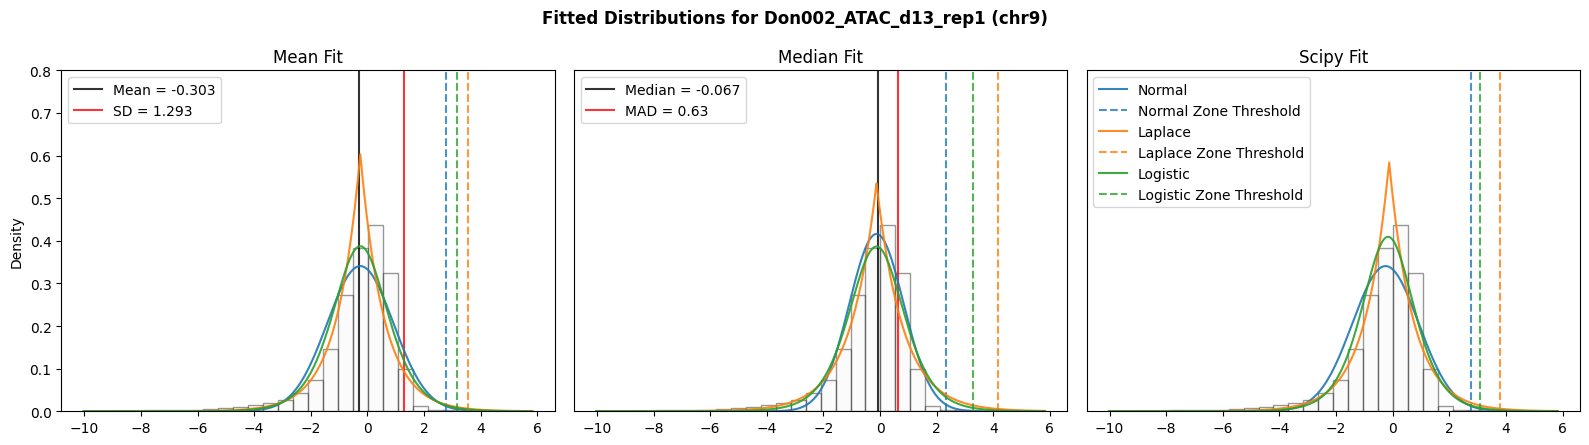

In [ ]:
sample_name = "Don002_ATAC_d13_rep1"
chromosome = "chr9"  

# Create distribution plots per sample
ery_atac_znorm.plotDistributionFit(plot_sample = sample_name,
                                   chromosome = chromosome,
                                   plot_distributions = ["normal", "laplace", "logistic"],
                                   plot_param_types = ["mean_fit", "median_fit", "scipy_fit"],
                                   plot_zone_threshold = True,
                                   zone_probability = 0.995,
                                   y_limits = [0, 0.8],
                                   plot_width = 16,
                                   plot_height = 4.5,
                                   title = f"Fitted Distributions for {sample_name} ({chromosome})",
                                   pdf_name = f"{sample_name}_Distributions_{chromosome}")

In [ ]:
ery_atac_zone_threshold = ery_atac_znorm.calculateZoneThreshold(sample = "Don002_ATAC_d13_rep1", chromosome = "chr16", param_type = "median_fit", 
                                             dist_name = "laplace", zone_probability = 0.995)

ery_atac_znorm.plotTracks(chromosome = "chr5", 
                          start_coord = 342825,
                          end_coord = 357106,
                          plot_samples = ery_atac_znorm.regexFindSamples(regex = "1_neg", ignore_case = True),
                          y_intercept = ery_atac_zone_threshold)

### 4.4) Signal Zone Prediction <a id="run-zen-zones"></a>

In [ ]:
# Use distribution to predict signal zone coordinates
ery_atac_znorm.predictSignalZones()
ery_atac_znorm.createZoneBED(zone_type = "padded")

### 4.5) Creating Normalised bigWigs <a id="run-zen-norm"></a>

In [ ]:
# Create normalised bigWigs
ery_atac_znorm.normaliseSignal(replace_existing = True)

## 5) Comparing Normalisation Method Performance Genome-Wide <a id="norm-compare"></a>

## TODO

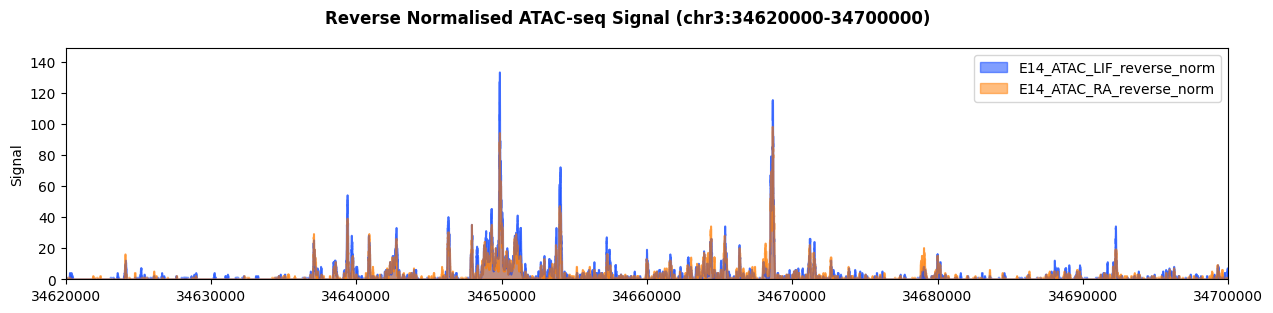

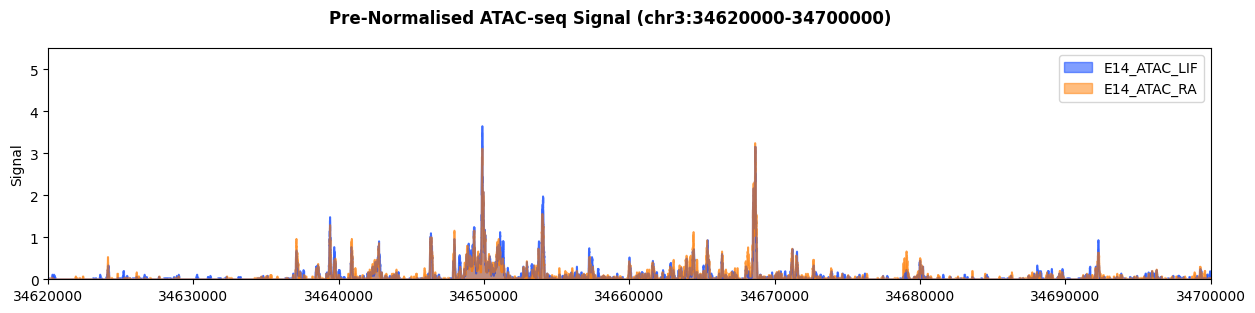

In [36]:
# SOX2 loci
chromosome = "chr3"
start = 34620000
end = 34700000
mesc_atac_znorm.plotTracks(chromosome = chromosome,
                            start_coord = start,
                            end_coord = end,
                            overlay_plots = True,
                            main_title = f"Reverse Normalised ATAC-seq Signal ({chromosome}:{start}-{end})")

# SOX2 loci
chromosome = "chr3"
start = 34620000
end = 34700000
mesc_rev.plotTracks(chromosome = chromosome,
                            start_coord = start,
                            end_coord = end,
                            overlay_plots = True,
                            main_title = f"Pre-Normalised ATAC-seq Signal ({chromosome}:{start}-{end})")

In [ ]:
# analysis = "Mononuclear_AML"
# input_paths = "/ceph/project/Wellcome_Discovery/towilson/Datasets/Human/Leukaemia/Mononuclear_AML_N_Ahmed_2024/hg38/bigWigs/Raw"
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", filter_strand = False, genome_size = "hg38", chromosomes = [], verbose = 2)

# analysis = "H1_Brain"
# input_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Brain/H1_Forbrain_Midbrain_CE_Dundes_2025/hg38/ATAC_Raw"
# input_paths = ["/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Brain/H1_Forbrain_Midbrain_CE_Dundes_2025/hg38/ATAC_Raw/H1_hPSC_Rep1.bw",
#                "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Brain/H1_Forbrain_Midbrain_CE_Dundes_2025/hg38/ATAC_Raw/H1_hPSC_Rep2.bw",
#                "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Brain/H1_Forbrain_Midbrain_CE_Dundes_2025/hg38/ATAC_Raw/H1_hPSC_Rep3.bw",
#                "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Brain/H1_Forbrain_Midbrain_CE_Dundes_2025/hg38/ATAC_Raw/Definitive_Ectoderm_Rep1.bw",
#                "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Brain/H1_Forbrain_Midbrain_CE_Dundes_2025/hg38/ATAC_Raw/Definitive_Ectoderm_Rep2.bw",
#                "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Brain/H1_Forbrain_Midbrain_CE_Dundes_2025/hg38/ATAC_Raw/Definitive_Ectoderm_Rep3.bw"]
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", filter_strand = False, genome_size = "hg38", chromosomes = [], verbose = 2)

# analysis = "HeLa_TTseq"
# input_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Cervical_Carcinoma/HeLa_TT-seq_A_Fiszbein_2024/hg38/TT-seq_Raw"
# #input_paths = glob.glob(os.path.join(input_paths, "*_Pos.bw"))
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", filter_strand = True, genome_size = "hg38", chromosomes = [], verbose = 2)

# analysis = "SEM_TTseq"
# input_paths = "/ceph/project/Wellcome_Discovery/towilson/Datasets/Human/Leukaemia/SEM_MENi_TT-seq/hg38/bigWigs"
# #input_paths = glob.glob(os.path.join(input_paths, "*_Pos_*.bw"))
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", filter_strand = True, genome_size = "hg38", chromosomes = [], verbose = 2)

# analysis = "A375ML_TTseq"
# input_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Melanoma/A-375ML_Insco_2023/hg38/TTseq_Raw"
# #input_paths = glob.glob(os.path.join(input_paths, "*_Pos.bw"))
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", filter_strand = True, genome_size = "hg38", chromosomes = [], verbose = 2)

# analysis = "HEK293T_TTseq"
# input_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Kidney/HEK293T_CA_Mimoso_2023/hg38/TTseq_Raw"
# #input_paths = glob.glob(os.path.join(input_paths, "*_Pos.bw"))
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", filter_strand = True, genome_size = "hg38", chromosomes = [], verbose = 2)

analysis = "RAD21_Logistic"
input_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Erythroid/50_Donors_Erythroid/hg38/E_Georgiades_2025/RAD21/Raw"
znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
                 zone_probability = 0.99,
                 n_cores = n_cores, norm_method = "ZEN", filter_strand = False, genome_size = "hg38", chromosomes = [], verbose = 2)

# analysis = "Erythroid_CTCF"
# input_paths = ["/ceph/project/Wellcome_Discovery/towilson/Datasets/Human/Erythroid/50_Erythroid_Donors/hg38/Unpublished/CTCF_ChIP-seq/bigWigs/Don001_Ery_d13_CS_rep1.bw",
#                "/ceph/project/Wellcome_Discovery/towilson/Datasets/Human/Erythroid/50_Erythroid_Donors/hg38/Unpublished/CTCF_ChIP-seq/bigWigs/Don002_Ery_d13_CS_rep1.bw",
#                "/ceph/project/Wellcome_Discovery/towilson/Datasets/Human/Erythroid/50_Erythroid_Donors/hg38/Unpublished/CTCF_ChIP-seq/bigWigs/Don030_Ery_d13_CS_rep1.bw"]
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", filter_strand = False, genome_size = "hg38", chromosomes = [], verbose = 2)

# analysis = "HEL_Pol2"
# input_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Leukaemia/MLL_Pol2_G_Wei_2016/hg38/ChIP-seq_Raw"
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", filter_strand = False, genome_size = "hg38", chromosomes = [], verbose = 2)

# analysis = "MPAL"
# input_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/Leukaemia/MPAL_Multiome/hg38/ARC_2.0.2/All_Cells/scATAC_Raw"
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", chromosomes = [], verbose = 2)

# analysis = "CATlas"
# input_paths = "/ceph/project/Wellcome_Discovery/datashare/towilson/Trackhubs/Human/CATlas/hg38/scATAC_Reverse_Normalised"
# znorm = ZoneNorm(analysis_name = analysis, bigwig_paths = input_paths, test_distributions = ZoneNorm.scipy_distributions.keys(),
#                  n_cores = n_cores, norm_method = "ZEN", chromosomes = [], verbose = 2)